In [2]:
# 범주형 - 범주형 구조에 대한 데이터 분석

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)
#
font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [3]:
accident = pd.read_csv('accident.csv')

In [4]:
accident.drop(['사고번호', '시군구'], axis= 1)

,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014년 1월 1일 00시,수요일,부상신고사고,0,0,0,2,차대차 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014년 1월 1일 01시,수요일,중상사고,0,1,3,0,차대차 - 기타,안전운전불이행,기타,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014년 1월 1일 02시,수요일,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014년 1월 1일 02시,수요일,경상사고,0,0,2,0,차대차 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014년 1월 1일 02시,수요일,경상사고,0,0,2,0,차대차 - 측면직각충돌,기타,건조,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,2023년 12월 30일 05시,토요일,경상사고,0,0,1,0,차대사람 - 차도통행중,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,보행자,여,81세 이상,경상
26266,2023년 12월 30일 13시,토요일,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,젖음/습기,눈,교차로 - 교차로부근,승용,남,63세,상해없음,화물,남,60세,경상
26267,2023년 12월 30일 13시,토요일,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,서리/결빙,눈,단일로 - 기타,승용,남,27세,상해없음,승용,남,59세,경상
26268,2023년 12월 31일 15시,일요일,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,48세,상해없음,승용,남,37세,경상


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터프레임 생성 (예시 데이터)
df = accident[['가해운전자 상해정도', '가해운전자 성별']]

In [55]:
df.rename(columns={'가해운전자 성별': '가해운전자_성별'}, inplace=True)
df.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)

C:\Users\medici\AppData\Local\Temp\ipykernel_17436\2449509602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'가해운전자 성별': '가해운전자_성별'}, inplace=True)
C:\Users\medici\AppData\Local\Temp\ipykernel_17436\2449509602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'가해운전자 상해정도': '가해운전자_상해정도'}, inplace=True)


In [16]:
import pandas as pd
import scipy.stats as stats

# 예시 데이터
# 교차 테이블 생성
contingency_table = pd.crosstab(df['가해운전자_성별'], df['가해운전자_상해정도'])

# 카이제곱 독립성 검정
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f'Chi2 Stat: {chi2}')
print(f'p-value: {p}')


Chi2 Stat: 67.46945483826154
p-value: 3.442210340413554e-13


In [33]:
from scipy.stats import chi2_contingency
def cramers_v(chi2, n):
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

chi2, _, _, _ = chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()
cramers_v_value = cramers_v(chi2, n)

print(f'Cramér\'s V: {cramers_v_value}')

Cramér's V: 0.05067847807519055


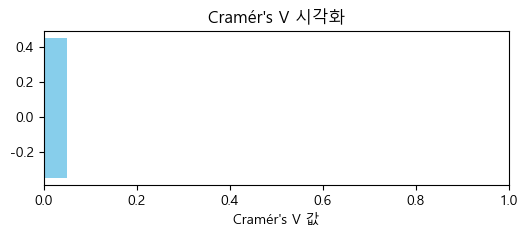

In [34]:
cramers_v= 0.05067847807519055
plt.figure(figsize=(6, 2))
plt.barh([cramers_v], [cramers_v_value], color='skyblue')
plt.xlabel('Cramér\'s V 값')
plt.title('Cramér\'s V 시각화')
plt.xlim(0, 1)  # Cramér's V는 0에서 1 사이의 값
plt.show()

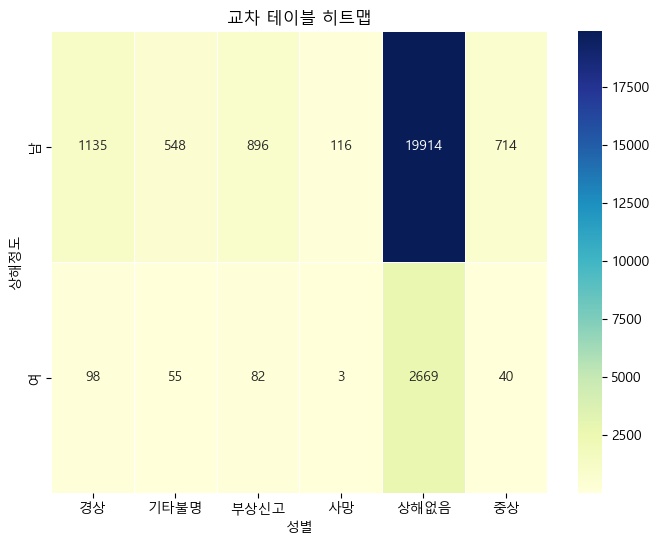

In [17]:
#카이제곱에 대한 시각화

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=.5)
plt.title('교차 테이블 히트맵')
plt.xlabel('성별')
plt.ylabel('상해정도')
plt.show()